# Amr Wael Abdelmawgod Mohamed Abdelaal
## The Sparks Foundation
### Data Science & Business Analytics Track
# --------------------------------------------------------------------------
## Task 2:
  - Predict the optimum number of clusters from the given 'Iris' dataset of the scikit-learn library
  - Represent the clusters visually

# --------------------------------------------------------------------------

## Import the required libraries

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

## Read the dataset and Display some Information about it

In [66]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [67]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Find the optimum number of clusters
## Using the elbow method

In [68]:
X = data.iloc[:, [0, 1, 2, 3]].values
cluster_sum_squares = []

for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    cluster_sum_squares.append(kmeans.inertia_)

## Plot the results
## to Determine the 'elbow'

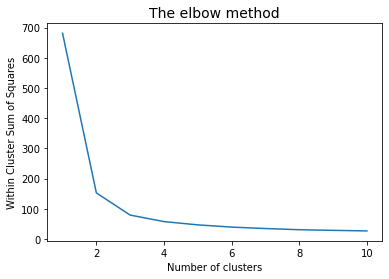

In [69]:
plt.plot(range(1, 11), cluster_sum_squares)
plt.title('The elbow method', size=14)
plt.xlabel('Number of clusters', size=10)
plt.ylabel('Within Cluster Sum of Squares', size=10)
plt.show()

## The 'elbow' occurs at 3
## Apply kmeans to the data

In [70]:
kmeans = KMeans(3)
Y = kmeans.fit_predict(X)

## Plot the clusters and their centroids

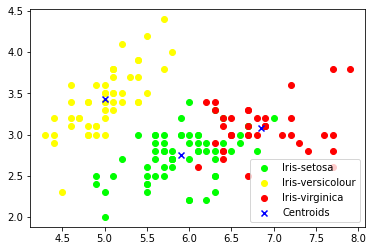

In [71]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='#00ff00', label='Iris-setosa')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='#ffff00', label='Iris-versicolour')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], c='#ff0000', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], marker='x', c='#0000ff', label='Centroids')
plt.legend()